 # Cour de data mining : pratique 

In [28]:
# install dependecies
%pip install --upgrade pip
%pip install statsmodels
%pip install numpy
%pip install mlxtend
%pip install apyori
#%uv add statsmodels

/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=151288) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=151288) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=151288) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=151288) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=151288) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from apyori import apriori as ap

In [30]:
# Data 
X = np.array([17, 18, 39, 45, 17, 55, 22, 29, 31, 44])
Y = np.array([1, 3, 4, 2, 5, 8, 8, 9, 10, 12])
x_with_const = sm.add_constant(X)
# ajout de la constante pour le biais
model = sm.OLS(Y, x_with_const).fit()
# ajustement du modèle de regression linéaire
predictions = model.predict(x_with_const)

# extraction des coefficients
B, a = model.params
B, a
print("B: ", B)
model.summary()

B:  3.280541886884146


/home/aziz/.local/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.019
Date:                Wed, 26 Mar 2025   Prob (F-statistic):              0.342
Time:                        19:51:18   Log-Likelihood:                -26.162
No. Observations:                  10   AIC:                             56.32
Df Residuals:                       8   BIC:                             56.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2805      3.120      1.051      0.324      -3.915      10.476
x1             0.0921      0.091      1.009      0.342      -0.118       0.303
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                0.761
Skew:                          -0.111   Prob(JB):                        0.683
Kurtosis:                       1.667   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# association d' idées

In [31]:
# exemple de dataframe binaire
df_bin = pd.DataFrame({
    "Pain": [1, 0, 1],
    "Lait": [1, 1, 1],
    "Beurre": [0, 1, 0],
    "Fromage": [0, 1, 0]
})
print(df_bin)

   Pain  Lait  Beurre  Fromage
0     1     1       0        0
1     0     1       1        1
2     1     1       0        0


In [32]:
# Utiliser apriori pour trouver les itemsets fréquents
frequent_itemsets = apriori(df_bin, min_support=0.1, use_colnames=True)

print("Itemsets fréquents :")

Itemsets fréquents :


/home/aziz/.local/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
print(frequent_itemsets)

    support                 itemsets
0  0.666667                   (Pain)
1  1.000000                   (Lait)
2  0.333333                 (Beurre)
3  0.333333                (Fromage)
4  0.666667             (Pain, Lait)
5  0.333333           (Lait, Beurre)
6  0.333333          (Lait, Fromage)
7  0.333333        (Fromage, Beurre)
8  0.333333  (Lait, Fromage, Beurre)


In [34]:
# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("\nRègles d’association :")


Règles d’association :


/home/aziz/.local/lib/python3.13/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [35]:
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])

          antecedents        consequents   support  confidence  lift
0              (Pain)             (Lait)  0.666667    1.000000   1.0
1              (Lait)             (Pain)  0.666667    0.666667   1.0
2              (Lait)           (Beurre)  0.333333    0.333333   1.0
3            (Beurre)             (Lait)  0.333333    1.000000   1.0
4              (Lait)          (Fromage)  0.333333    0.333333   1.0
5           (Fromage)             (Lait)  0.333333    1.000000   1.0
6           (Fromage)           (Beurre)  0.333333    1.000000   3.0
7            (Beurre)          (Fromage)  0.333333    1.000000   3.0
8     (Lait, Fromage)           (Beurre)  0.333333    1.000000   3.0
9      (Lait, Beurre)          (Fromage)  0.333333    1.000000   3.0
10  (Fromage, Beurre)             (Lait)  0.333333    1.000000   1.0
11             (Lait)  (Fromage, Beurre)  0.333333    0.333333   1.0
12          (Fromage)     (Lait, Beurre)  0.333333    1.000000   3.0
13           (Beurre)    (Lait, Fr

In [36]:
# Transactions avec des associations différentes
df = pd.DataFrame({
    "Pain":      [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    "Lait":      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],  # Lait aléatoire → Lift ≈ 1
    "Beurre":    [1, 1, 0, 1, 0, 1, 1, 1, 1, 1],  # Beurre souvent avec Pain → Lift > 1
    "Café":      [0, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # Café rarement avec Pain → Lift < 1
})

print("\nDonnées binaires :")


Données binaires :


In [37]:
print(df)

   Pain  Lait  Beurre  Café
0     1     1       1     0
1     1     0       1     0
2     0     1       0     1
3     1     1       1     0
4     0     1       0     1
5     1     0       1     1
6     1     1       1     0
7     0     1       1     1
8     1     0       1     0
9     0     1       1     1


In [38]:
# Extraction des ensembles fréquents
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

print("Itemsets fréquents :")

Itemsets fréquents :


/home/aziz/.local/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
print(frequent_itemsets)

   support              itemsets
0      0.6                (Pain)
1      0.7                (Lait)
2      0.8              (Beurre)
3      0.5                (Café)
4      0.3          (Pain, Lait)
5      0.6        (Pain, Beurre)
6      0.5        (Lait, Beurre)
7      0.4          (Lait, Café)
8      0.3        (Beurre, Café)
9      0.3  (Pain, Beurre, Lait)


In [40]:
# Génération des règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

# Trier les règles par lift
rules = rules.sort_values(by="lift", ascending=False)

print("\nRègles d’association :")
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])


Règles d’association :
       antecedents     consequents  support  confidence      lift
2           (Pain)        (Beurre)      0.6    1.000000  1.250000
11    (Pain, Lait)        (Beurre)      0.3    1.000000  1.250000
3         (Beurre)          (Pain)      0.6    0.750000  1.250000
14        (Beurre)    (Pain, Lait)      0.3    0.375000  1.250000
6           (Lait)          (Café)      0.4    0.571429  1.142857
7           (Café)          (Lait)      0.4    0.800000  1.142857
12  (Lait, Beurre)          (Pain)      0.3    0.600000  1.000000
13          (Pain)  (Lait, Beurre)      0.3    0.500000  1.000000
5         (Beurre)          (Lait)      0.5    0.625000  0.892857
4           (Lait)        (Beurre)      0.5    0.714286  0.892857
8         (Beurre)          (Café)      0.3    0.375000  0.750000
9           (Café)        (Beurre)      0.3    0.600000  0.750000
1           (Lait)          (Pain)      0.3    0.428571  0.714286
15          (Lait)  (Pain, Beurre)      0.3    0.428

# Cas 2

In [41]:
# Exemple de DataFrame transactionnel (chaque ligne = une transaction)
transactions = [
    ["Pain", "Lait"],
    ["Lait", "Beurre", "Fromage"],
    ["Pain", "Lait"]
]

In [42]:
print("Transactions :", transactions)

Transactions : [['Pain', 'Lait'], ['Lait', 'Beurre', 'Fromage'], ['Pain', 'Lait']]


In [43]:
rules = ap(transactions, min_support=0.1, min_confidence=0.5, min_lift=1.0)

# Convertir les résultats en une liste exploitable
rules_list = list(rules)

In [44]:
# Afficher les règles trouvées
for rule in rules_list:
    items = list(rule.items)
    support = rule.support
    for ordered_stat in rule.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift

        print(f"Règle : {antecedent} → {consequent}")
        print(f"  - Support : {support:.2f}")
        print(f"  - Confiance : {confidence:.2f}")
        print(f"  - Lift : {lift:.2f}\n")

Règle : [] → ['Lait']
  - Support : 1.00
  - Confiance : 1.00
  - Lift : 1.00

Règle : [] → ['Pain']
  - Support : 0.67
  - Confiance : 0.67
  - Lift : 1.00

Règle : ['Beurre'] → ['Fromage']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 3.00

Règle : ['Fromage'] → ['Beurre']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 3.00

Règle : ['Beurre'] → ['Lait']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 1.00

Règle : ['Fromage'] → ['Lait']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 1.00

Règle : [] → ['Lait', 'Pain']
  - Support : 0.67
  - Confiance : 0.67
  - Lift : 1.00

Règle : ['Lait'] → ['Pain']
  - Support : 0.67
  - Confiance : 0.67
  - Lift : 1.00

Règle : ['Pain'] → ['Lait']
  - Support : 0.67
  - Confiance : 1.00
  - Lift : 1.00

Règle : ['Beurre'] → ['Lait', 'Fromage']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 3.00

Règle : ['Fromage'] → ['Lait', 'Beurre']
  - Support : 0.33
  - Confiance : 1.00
  - Lift : 3.00

Règle : ['Fromage', 'Beurre'] → ['

In [45]:
from sklearn.preprocessing import LabelEncoder

# 1. Charger les données
data = pd.DataFrame({
    "Âge": ["Petit", "Petit", "Moyen", "Sénior", "Sénior", "Sénior", "Moyen",
            "Petit", "Petit", "Sénior", "Petit", "Moyen", "Moyen", "Sénior"],
    "Salaire": ["Haut", "Haut", "Haut", "Moyen", "Bas", "Bas", "Bas",
                "Moyen", "Bas", "Moyen", "Moyen", "Moyen", "Haut", "Moyen"],
    "Étudiant": ["Non", "Non", "Non", "Non", "Oui", "Oui", "Non", "Non",
                 "Oui", "Oui", "Oui", "Non", "Oui", "Non"],
    "A_acheté": ["Non", "Non", "Oui", "Oui", "Oui", "Non", "Oui", "Non",
                 "Oui", "Oui", "Oui", "Oui", "Oui", "Non"]
})
# 2. Encoder les variables catégoriques
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# 3. Séparer les variables explicatives (X) et la cible (y)
X = data.drop("A_acheté", axis=1)
y = data["A_acheté"]
X


,Âge,Salaire,Étudiant
0,1,1,0
1,1,1,0
2,0,1,0
3,2,2,0
4,2,0,1
5,2,0,1
6,0,0,0
7,1,2,0
8,1,0,1
9,2,2,1


In [46]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: A_acheté, dtype: int64

In [47]:
from sklearn.tree import DecisionTreeClassifier

# 4. Construire l'arbre de décision
arbre = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
arbre.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

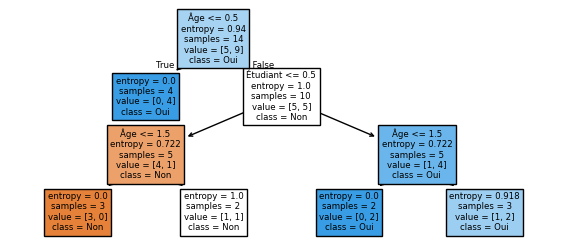

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(7, 3))
plot_tree(arbre, feature_names=["Âge", "Salaire", "Étudiant"], class_names=["Non", "Oui"], filled=True)
plt.show()